In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import copy

In [22]:
# helps from: https://www.geeksforgeeks.org/merge-sort/
def RecursiveMergeSort(input_array, is_first = True):
    time_start = time.time()
    compare_time = 0
    if is_first:
        sort_array = copy.deepcopy(input_array) # sort, but not change orignial array(strange)
    else:
        sort_array = input_array
    if len(sort_array) > 1: # stop base
        mid = len(sort_array)//2
        left_array = sort_array[:mid]
        right_array = sort_array[mid:]
        # recursive
        left_temp = RecursiveMergeSort(left_array, is_first = False)
        if left_temp != None:
            compare_time += left_temp[0]
        right_temp = RecursiveMergeSort(right_array, is_first = False)
        if right_temp != None:
            compare_time += right_temp[0]
        # merge part
        i = j = k = 0
        while i < len(left_array) and j < len(right_array):
            compare_time += 1
            if left_array[i] < right_array[j]:
                sort_array[k] = left_array[i]
                i += 1
            else:
                sort_array[k] = right_array[j]
                j += 1
            k += 1
            
        while i < len(left_array):
            sort_array[k] = left_array[i]
            k += 1
            i += 1
            
        while j < len(right_array):
            sort_array[k] = right_array[j]
            k += 1
            j += 1
            
        time_finish = time.time()
        time_run = time_finish - time_start
        # check if sort_array is sorted, of course
        #if is_first:
        #    print(sort_array)
        return compare_time, time_run
    
# iterative merge sort
# helps: https://www.geeksforgeeks.org/iterative-merge-sort/
def IterativeMergeSort(input_array): 
    time_start = time.time()
    compare_time = 0
    
    current_size = 1
    sort_array = copy.deepcopy(input_array) # sort, but not change orignial array(strange)

    while current_size < len(sort_array) - 1: 
          
        left = 0
        while left < len(sort_array)-1: 
            
            mid = left + current_size - 1 
            right = ((2 * current_size + left - 1, len(sort_array) - 1)\
                     [2 * current_size + left - 1 > len(sort_array)-1])                             
            # Merge each subarray
            compare_time += merge(sort_array, left, mid, right) 
            left = left + current_size*2
        # have new sixe for subarray
        current_size = 2 * current_size 
        
    time_finish = time.time()
    time_run = time_finish - time_start
    return compare_time, time_run
        
def merge(input_array, left, mid, right): 
    compare_time = 0
    # length for each subarray to be merged
    n1 = mid - left + 1
    n2 = right - mid 
    # create zreos subarrays
    L = [0] * n1 
    R = [0] * n2 
    for i in range(0, n1): 
        L[i] = input_array[left + i] 
    for i in range(0, n2): 
        R[i] = input_array[mid + i + 1] 
    # merge
    i, j, k = 0, 0, left 
    while i < n1 and j < n2: 
        compare_time += 1
        if L[i] > R[j]: 
            input_array[k] = R[j] 
            j += 1
        else: 
            input_array[k] = L[i] 
            i += 1
        k += 1
  
    while i < n1: 
        input_array[k] = L[i] 
        i += 1
        k += 1
  
    while j < n2: 
        input_array[k] = R[j] 
        j += 1
        k += 1
        
    return compare_time
  

In [23]:
input_1024_0 = np.loadtxt('./data/data0.1024', int)
input_2048_0 = np.loadtxt('./data/data0.2048', int)
input_4096_0 = np.loadtxt('./data/data0.4096', int)
input_8192_0 = np.loadtxt('./data/data0.8192', int)
input_16384_0 = np.loadtxt('./data/data0.16384', int)
input_32768_0 = np.loadtxt('./data/data0.32768', int)

input_1024_1 = np.loadtxt('./data/data1.1024', int)
input_2048_1 = np.loadtxt('./data/data1.2048', int)
input_4096_1 = np.loadtxt('./data/data1.4096', int)
input_8192_1 = np.loadtxt('./data/data1.8192', int)
input_16384_1 = np.loadtxt('./data/data1.16384', int)
input_32768_1 = np.loadtxt('./data/data1.32768', int)

input_data = [input_1024_0, input_1024_1, input_2048_0, input_2048_1, input_4096_0, input_4096_1, \
             input_8192_0, input_8192_1, input_16384_0, input_16384_1, input_32768_0, input_32768_1]

In [24]:
result = []
for i in input_data:
    result.append(RecursiveMergeSort(i))
print(result)

[(5120, 0.00496220588684082), (7158, 0.0060155391693115234), (11264, 0.012934446334838867), (16173, 0.012997150421142578), (24576, 0.023935317993164062), (34416, 0.02692866325378418), (53248, 0.05186152458190918), (72721, 0.05684947967529297), (114688, 0.10668516159057617), (164908, 0.12370181083679199), (245760, 0.24032950401306152), (346348, 0.34910130500793457)]


In [8]:
recursive_merge_compare_0 = []
recursive_merge_compare_1 = []
recursive_merge_runtime_0 = []
recursive_merge_runtime_1 = []
for i in range(0, len(result), 2):
    recursive_merge_compare_0.append(result[i][0])
    recursive_merge_runtime_0.append(result[i][1])
    recursive_merge_compare_1.append(result[i+1][0])
    recursive_merge_runtime_1.append(result[i+1][1])
print(recursive_merge_compare_1)

[7158, 16173, 34416, 72721, 164908, 346348]


In [9]:
result = []
for i in input_data:
    result.append(IterativeMergeSort(i))
print(result)

[(5120, 0.005017757415771484), (8954, 0.004955768585205078), (11264, 0.01196742057800293), (19934, 0.013207197189331055), (24576, 0.022946834564208984), (43944, 0.022937774658203125), (53248, 0.04886937141418457), (96074, 0.0498661994934082), (114688, 0.0967414379119873), (208695, 0.10571718215942383), (245760, 0.20545077323913574), (450132, 0.22539758682250977)]


In [10]:
iterative_merge_compare_0 = []
iterative_merge_compare_1 = []
iterative_merge_runtime_0 = []
iterative_merge_runtime_1 = []
for i in range(0, len(result), 2):
    iterative_merge_compare_0.append(result[i][0])
    iterative_merge_runtime_0.append(result[i][1])
    iterative_merge_compare_1.append(result[i+1][0])
    iterative_merge_runtime_1.append(result[i+1][1])
print(iterative_merge_compare_1)

[8954, 19934, 43944, 96074, 208695, 450132]


In [11]:
np.savetxt('./result/recursice compare 0.txt', recursive_merge_compare_0, fmt='%f')
np.savetxt('./result/recursice compare 1.txt', recursive_merge_compare_1, fmt='%f')
np.savetxt('./result/recursice runtime 0.txt', recursive_merge_runtime_0, fmt='%f')
np.savetxt('./result/recursice runtime 1.txt', recursive_merge_runtime_1, fmt='%f')
np.savetxt('./result/iterative compare 0.txt', iterative_merge_compare_0, fmt='%f')
np.savetxt('./result/iterative compare 1.txt', iterative_merge_compare_1, fmt='%f')
np.savetxt('./result/iterative runtime 0.txt', iterative_merge_runtime_0, fmt='%f')
np.savetxt('./result/iterative runtime 1.txt', iterative_merge_runtime_1, fmt='%f')

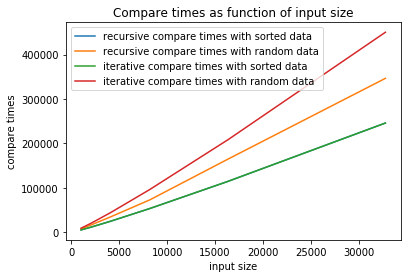

In [12]:
input_size = [1024, 2048, 4096, 8192, 16384, 32768]
plt.figure()
plt.plot(input_size, recursive_merge_compare_0, label = 'recursive compare times with sorted data')
plt.plot(input_size, recursive_merge_compare_1, label = 'recursive compare times with random data')
plt.plot(input_size, iterative_merge_compare_0, label = 'iterative compare times with sorted data')
plt.plot(input_size, iterative_merge_compare_1, label = 'iterative compare times with random data')
plt.legend(loc='upper left')
plt.title('Compare times as function of input size')
plt.xlabel('input size')
plt.ylabel('compare times')
#ax = plt.gca()
#ax.get_yaxis().get_major_formatter().set_scientific(False)
plt.savefig('./result/compare times vs input.jpg')
plt.show()

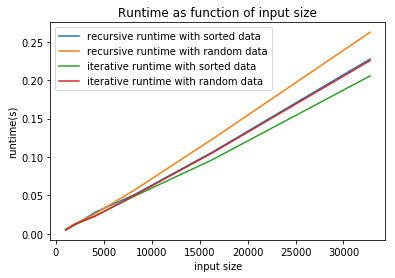

In [13]:
plt.figure()
plt.plot(input_size, recursive_merge_runtime_0, label = 'recursive runtime with sorted data')
plt.plot(input_size, recursive_merge_runtime_1, label = 'recursive runtime with random data')
plt.plot(input_size, iterative_merge_runtime_0, label = 'iterative runtime with sorted data')
plt.plot(input_size, iterative_merge_runtime_1, label = 'iterative runtime with random data')
plt.legend(loc='upper left')
plt.title('Runtime as function of input size')
plt.xlabel('input size')
plt.ylabel('runtime(s)')
#ax = plt.gca()
#ax.get_yaxis().get_major_formatter().set_scientific(False)
plt.savefig('./result/runtime vs input.jpg')
plt.show()